# Fitting Docker vs Faasd  Distribution

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions

pd.options.display.max_rows = 50
sns.set_theme(style="darkgrid")

In [2]:
dataset = pd.read_csv("results/resp_time_distribution.csv")

In [3]:
dataset.head()

,docker-distance,faasd-distance,docker-blockchain,faasd-blockchain
0,0.006729,0.131890,0.221331,0.575631
1,0.006311,0.132227,0.220521,0.599300
2,0.006329,0.129817,0.217973,0.582702
3,0.014750,0.129965,0.218725,0.585193
4,0.006341,0.132226,0.219362,0.593481


## Blockchain Response Time

### Docker

<AxesSubplot:xlabel='docker-blockchain', ylabel='Count'>

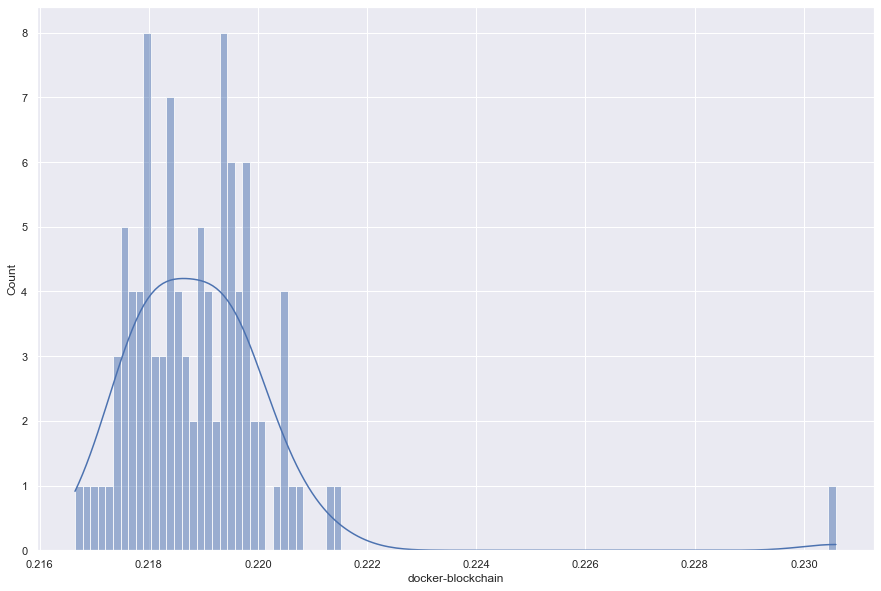

In [4]:
fig = plt.figure(figsize=(15, 10))

sns.histplot(data=dataset, x="docker-blockchain", bins=100, kde=True)

In [5]:
docker = dataset["docker-blockchain"].values

,sumsquare_error,aic,bic,kl_div
lognorm,5.159217e+05,-278.857643,868.669530,inf
rayleigh,5.309145e+05,165.627176,866.928958,inf
norm,6.168766e+05,486.751439,881.935746,inf
cauchy,7.760303e+05,-539.687110,904.888002,inf
expon,1.271699e+06,-599.313602,954.279796,inf


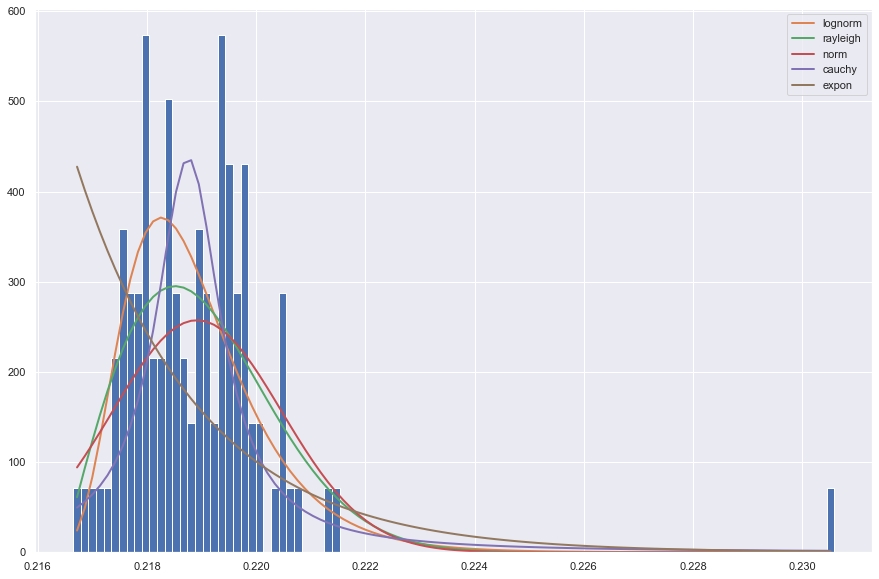

In [6]:
# f = Fitter(docker, timeout=100)
fig = plt.figure(figsize=(15, 10))

f = Fitter(docker, distributions=get_common_distributions())
f.fit()
f.summary(method='sumsquare_error')

### Faasd

<AxesSubplot:xlabel='faasd-blockchain', ylabel='Count'>

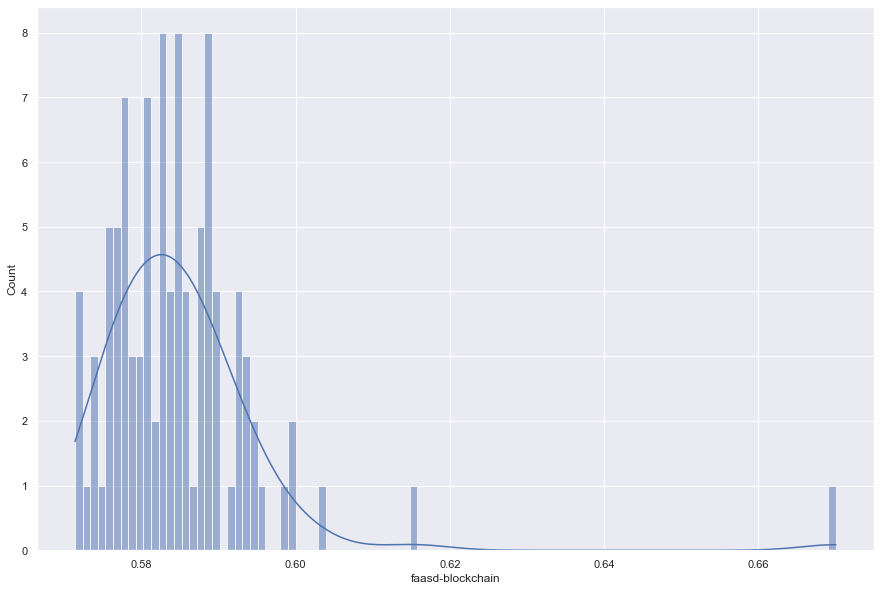

In [7]:
fig = plt.figure(figsize=(15, 10))

sns.histplot(data=dataset, x="faasd-blockchain", bins=100, kde=True)

In [8]:
faasd = dataset["faasd-blockchain"].values

,sumsquare_error,aic,bic,kl_div
lognorm,13018.098962,75.501438,500.708082,inf
rayleigh,13658.643283,680.860140,500.906103,inf
cauchy,15367.560043,-105.706414,512.694729,inf
norm,16438.005276,909.006732,519.428455,inf
exponpow,20297.933337,-73.032873,545.125927,inf


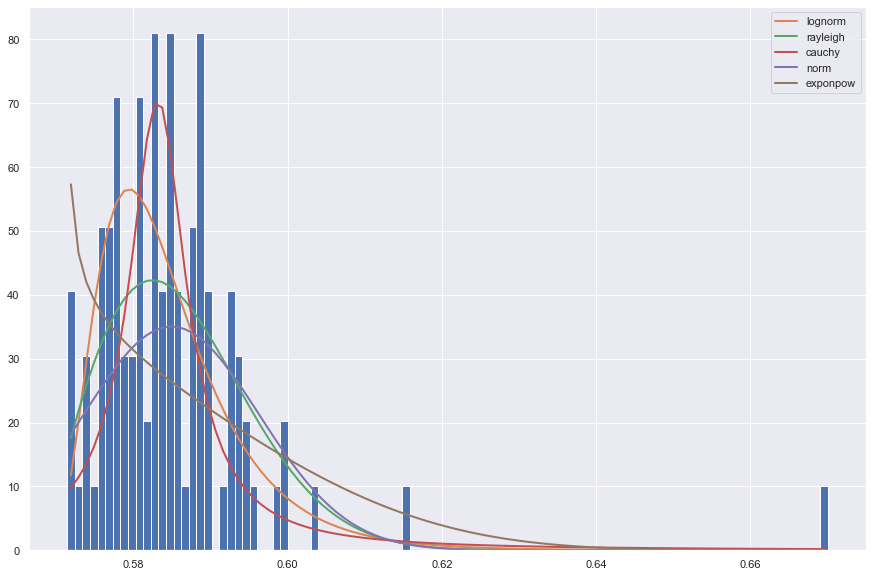

In [9]:
fig = plt.figure(figsize=(15, 10))

f = Fitter(faasd, distributions=get_common_distributions())
f.fit()
f.summary()

## String Distance Response Time

### Docker

<AxesSubplot:xlabel='docker-distance', ylabel='Count'>

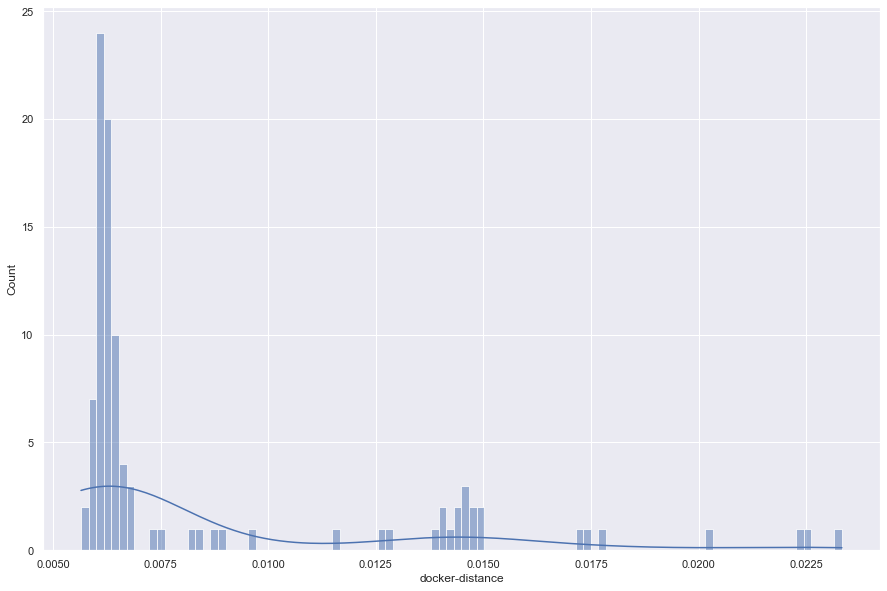

In [10]:
fig = plt.figure(figsize=(15, 10))

sns.histplot(data=dataset, x="docker-distance", bins=100, kde=True)

In [11]:
docker = dataset["docker-distance"].values

,sumsquare_error,aic,bic,kl_div
cauchy,3.511135e+05,-157.117831,825.579800,inf
lognorm,1.795848e+06,-536.844052,993.397309,inf
gamma,2.347756e+06,-522.073364,1020.195552,inf
expon,2.428433e+06,-562.779833,1018.968988,inf
chi2,2.570771e+06,-610.016643,1029.270115,inf


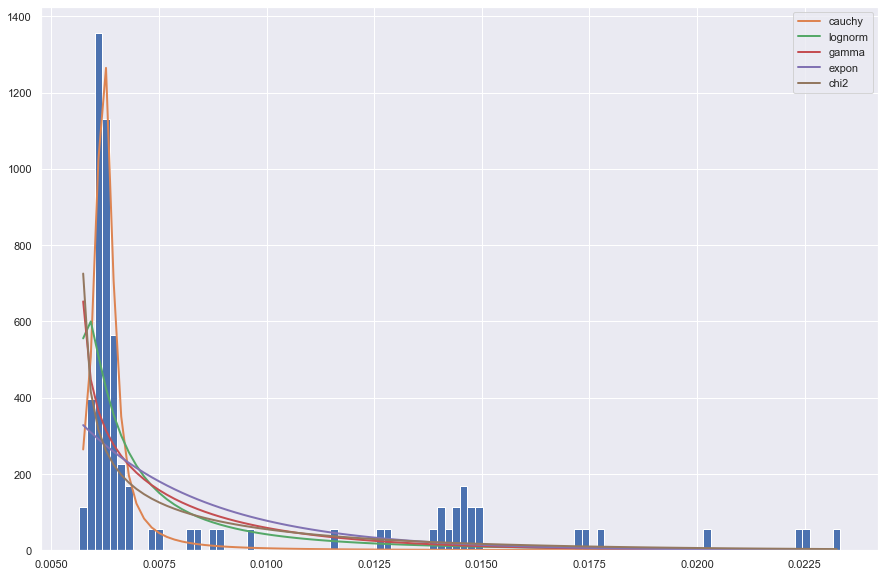

In [12]:
fig = plt.figure(figsize=(15, 10))

# f = Fitter(docker, timeout=100)
f = Fitter(docker, distributions=get_common_distributions())
f.fit()
f.summary()

### Faasd

<AxesSubplot:xlabel='faasd-distance', ylabel='Count'>

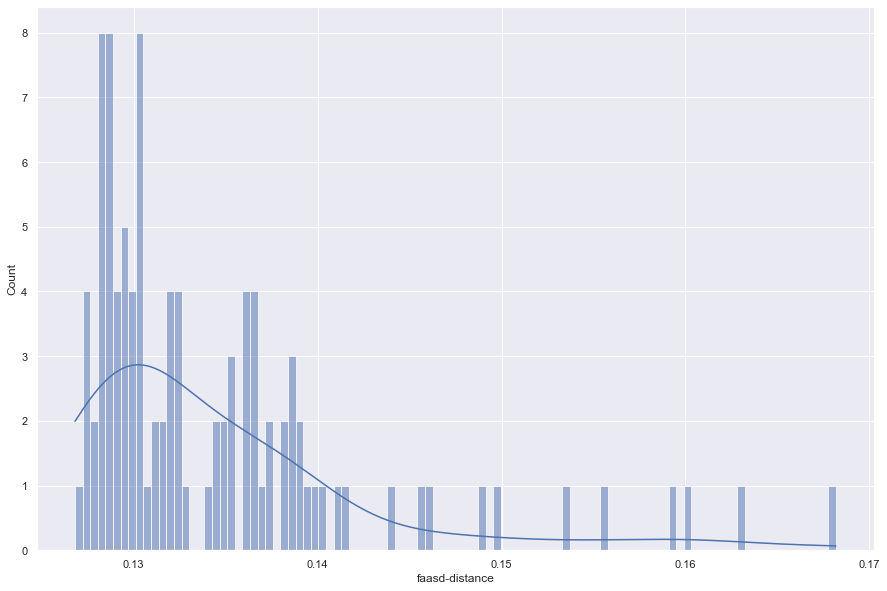

In [13]:
fig = plt.figure(figsize=(15, 10))

sns.histplot(data=dataset, x="faasd-distance", bins=100, kde=True)

In [14]:
faasd = dataset["faasd-distance"].values

,sumsquare_error,aic,bic,kl_div
lognorm,63454.105729,-424.346408,659.105710,inf
gamma,74215.491087,-426.460883,674.771310,inf
expon,79024.819687,-438.934774,676.445047,inf
cauchy,96212.125703,-322.571321,696.124389,inf
exponpow,102681.517996,-481.385029,707.237234,inf


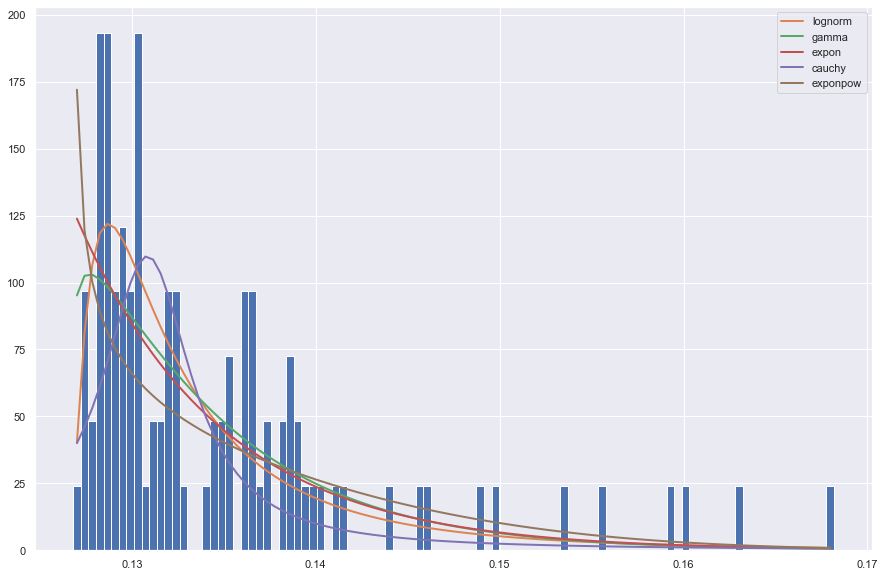

In [15]:
fig = plt.figure(figsize=(15, 10))

f = Fitter(faasd, distributions=get_common_distributions())
f.fit()
f.summary()